In [646]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


In [647]:
kukainputfolder = '/home/lhuang/working/FromRobbie/kuka_deep_pits/data/PROCESSED/'
outputfolder = '/home/lhuang/working/KuKa_Rothera_landice/Output/'
# if the folder does not exist, create it

if not os.path.exists(outputfolder):
    os.makedirs(outputfolder)

# data set 1
kuka_timestamp = '-Scat20230807-154351.nc'
ku_height = 155.5 /100
ka_height = 159.9 /100
snowpit_filename = '/home/lhuang/working/KuKa_Rothera_landice/ProcessedData/SnowPit1.xlsx'
snow_max = 1.0 # maximum snow depth
snow_bin =0.05 # bin of snow measurements

# # data set 2
# kuka_timestamp = '-Scat20230807-154955.nc'
# ku_height = 155.5 /100
# ka_height = 156.9 /100
# snowpit_filename = '/home/lhuang/working/KuKa_Rothera_landice/ProcessedData/SnowPit2.xlsx'
# snow_max = 1.8 # maximum snow depth
# snow_bin =0.1 # bin of snow measurements

# # data set 3
# kuka_timestamp = '-Scat20230807-155508.nc'
# ku_height = 155 /100
# ka_height = 158 /100
# snowpit_filename = []

# # data set 4
# kuka_timestamp = '-Scat20230807-155942.nc'
# ku_height = 155 /100
# ka_height = 159 /100
# snowpit_filename = []

# # data set 5
# kuka_timestamp = '-Scat20230807-160310.nc'
# ku_height = 153.6 /100
# ka_height = 157 /100
# snowpit_filename = '/home/lhuang/working/KuKa_Rothera_landice/ProcessedData/SnowPit3.xlsx'
# snow_max = 2.2 # maximum snow depth
# snow_bin =0.1 # bin of snow measurements

# # data set 6
# kuka_timestamp = '-Scat20230828-142953.nc'
# ku_height = 153.6 /100
# ka_height = 157 /100
# snowpit_filename = '/home/lhuang/working/KuKa_Rothera_landice/ProcessedData/SnowPit_0828.xlsx'
# snow_max = 2.7 # maximum snow depth
# snow_bin =0.1 # bin of snow measurements



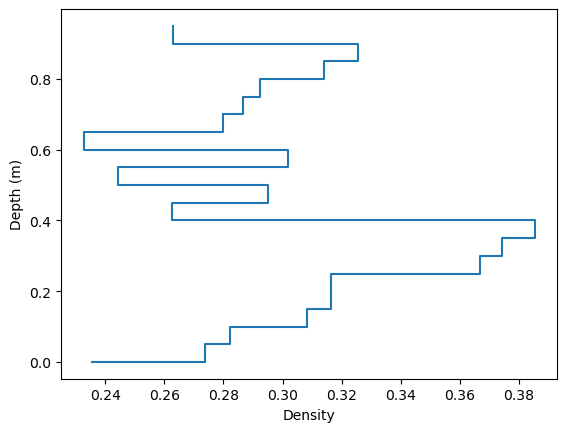

In [648]:
if len(snowpit_filename)==0:
    snowpit=[]
    

if len(snowpit_filename) > 0:
    snowpit =  pd.read_excel(snowpit_filename)
    
    # Upside down the layer column
    original_column = snowpit['Layers'].values
    upside_down_column = original_column[::-1]
    snowpit['SD'] = upside_down_column #snow depth from surface
    plt.figure()
    plt.step(snowpit['Density'], snowpit['SD']/100, where='post')
    # Set labels and title
    plt.xlabel('Density')
    plt.ylabel('Depth (m)')
    #plt.ylim(0, 20)
    plt.show()
    
    del original_column
    del upside_down_column
    


In [649]:

snowpit

,Layers,Density,Permittivity (50 MHz),Loss (50 MHz),SD
0,95,0.235469,1.89920,0.09436,0
1,90,0.273865,1.98465,0.08476,5
2,85,0.282315,1.97376,0.08523,10
3,80,0.308302,1.97312,0.07367,15
4,75,0.316257,1.99423,0.08786,25
5,70,0.323116,2.08234,0.19364,25
6,65,0.366815,2.09635,0.18223,30
7,60,0.374169,2.11436,0.19898,35
8,55,0.385342,2.19178,0.09780,40
9,50,0.262551,2.01545,0.02687,45


In [650]:
# Open the NetCDF file
for fq in ['Ku','Ka']:
    filename = 'kuka_stare_decon_'+fq+kuka_timestamp
    nc_file = nc.Dataset(kukainputfolder+filename, 'r')
    print("NetCDF file opened: ", filename)

    # Show all variables in the NetCDF file
    variable_list = []
    #print("Variables in the NetCDF file:")
    for var in nc_file.variables:
        #print(var)
        variable_list.append(var)
        
    # Access specific variable data
    if fq=='Ku':
        Kuvv_power_decon0 = nc_file.variables['vv_power_decon0'][:]
        Kuhh_power_decon0 = nc_file.variables['hh_power_decon0'][:]
        Kuhv_power_decon0 = nc_file.variables['hv_power_decon0'][:]
        Kuvh_power_decon0 = nc_file.variables['vh_power_decon0'][:]
        Ku_range = nc_file.variables['range'][:]
        Ku_lat = nc_file.variables['lat'][:]
        Ku_lon = nc_file.variables['lon'][:]
        Ku_start_time = nc_file.variables['start_time'][:]
        
    if fq=='Ka':
        Kavv_power_decon0 = nc_file.variables['vv_power_decon0'][:]
        Kahh_power_decon0 = nc_file.variables['hh_power_decon0'][:]
        Kahv_power_decon0 = nc_file.variables['hv_power_decon0'][:]
        Kavh_power_decon0 = nc_file.variables['vh_power_decon0'][:]
        Ka_range = nc_file.variables['range'][:]
        Ka_lat = nc_file.variables['lat'][:]
        Ka_lon = nc_file.variables['lon'][:]
        Ka_start_time = nc_file.variables['start_time'][:]

    #print(variable_data)
    
    #nc_file.close()

    variable_list
    

kuka_powers = {'Ku_vv': Kuvv_power_decon0, 'Ku_hh': Kuhh_power_decon0,'Ku_hv': Kuhv_power_decon0,'Ku_vh': Kuvh_power_decon0,
               'Ka_vv': Kavv_power_decon0, 'Ka_hh': Kahh_power_decon0,'Ka_hv': Kahv_power_decon0,'Ka_vh': Kavh_power_decon0,
               'Ku_range': Ku_range, 'Ka_range': Ka_range, 'Ku_start_time': Ku_start_time, 'Ka_start_time': Ka_start_time,
               'Ku_lat': Ku_lat, 'Ku_lon': Ku_lon, 'Ka_lat': Ka_lat, 'Ka_lon': Ka_lon}



NetCDF file opened:  kuka_stare_decon_Ku-Scat20230807-154351.nc
NetCDF file opened:  kuka_stare_decon_Ka-Scat20230807-154351.nc


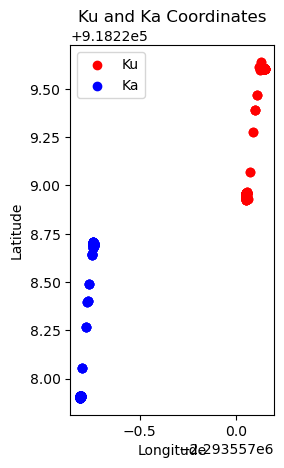

In [651]:
# plot gecoordinates of Ku_lat and Ku_lon
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Create a GeoDataFrame for Ku coordinates
ku_geometry = [Point(lon, lat) for lon, lat in zip(Ku_lon, Ku_lat)]
ku_gdf = gpd.GeoDataFrame(geometry=ku_geometry, crs='EPSG:4326')

# Create a GeoDataFrame for Ka coordinates
ka_geometry = [Point(lon, lat) for lon, lat in zip(Ka_lon, Ka_lat)]
ka_gdf = gpd.GeoDataFrame(geometry=ka_geometry, crs='EPSG:4326')

ka_gdf = ka_gdf.to_crs('EPSG:3031')
ku_gdf = ku_gdf.to_crs('EPSG:3031')
# Plot the points
fig, ax = plt.subplots()
ku_gdf.plot(ax=ax, color='red', label='Ku')
ka_gdf.plot(ax=ax, color='blue', label='Ka')

# Add legend and labels
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Ku and Ka Coordinates')
plt.show()

In [652]:
# #---- check the input configs!!!------
# #make sure you input the correct configvars before running the code
# nc_file = nc.Dataset(kukainputfolder + filename, 'r')
# print(nc_file.groups['configvars'])

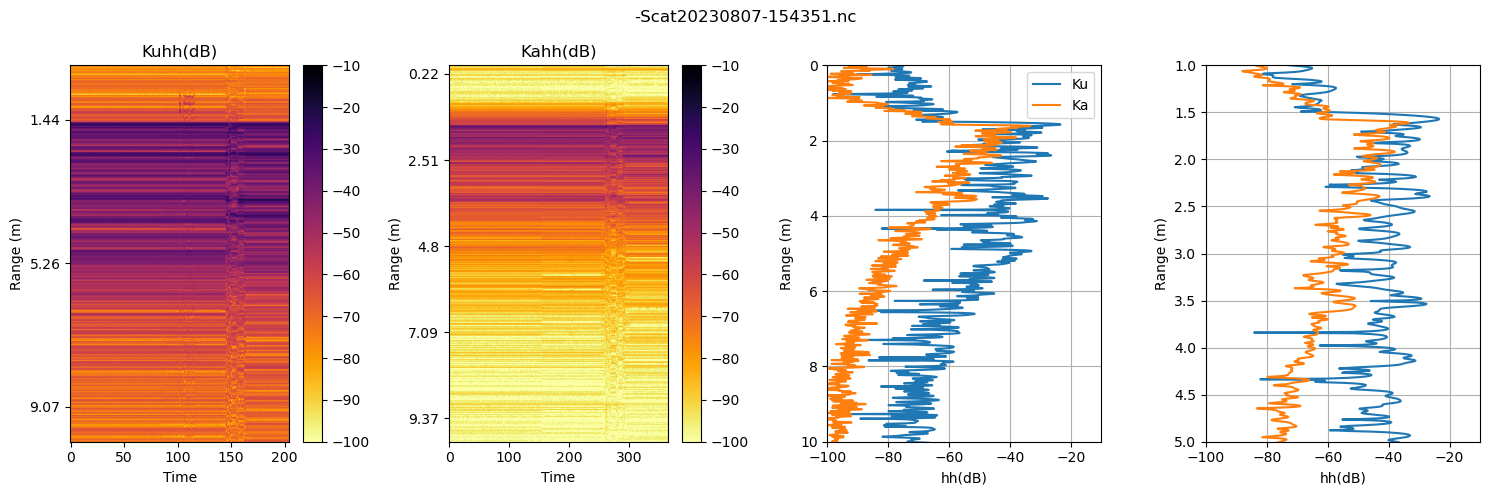

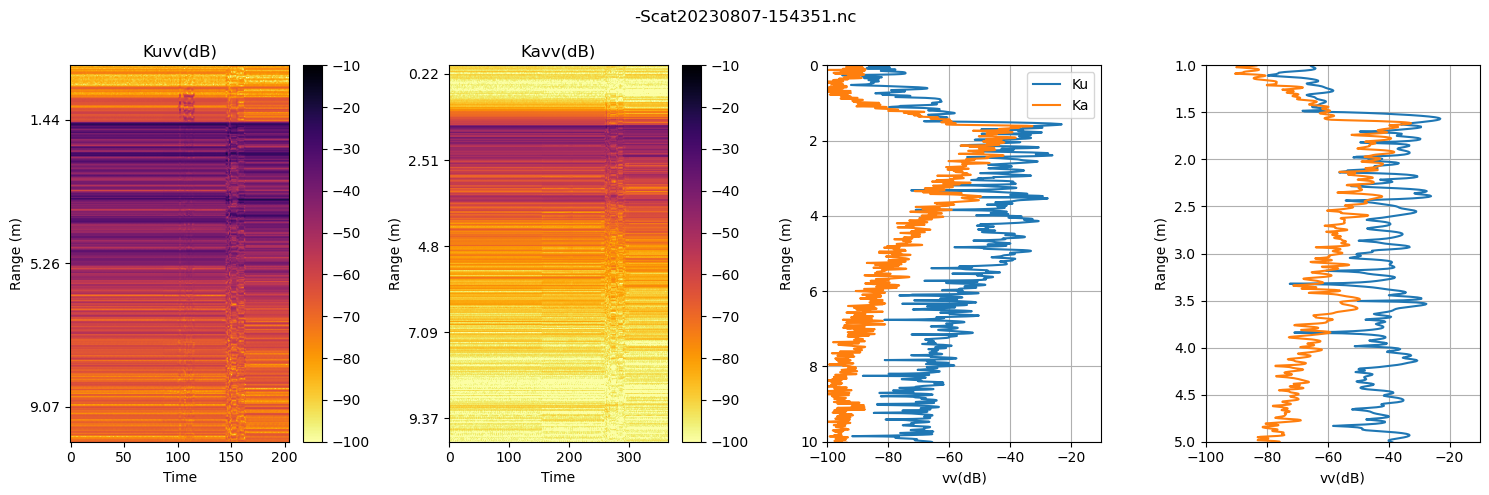

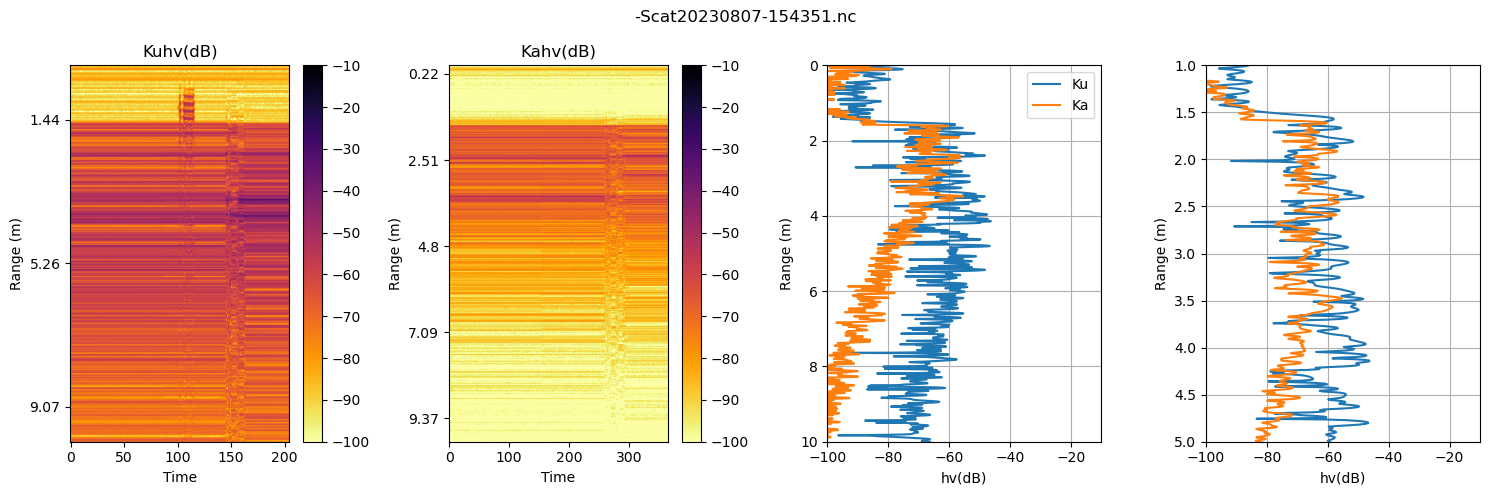

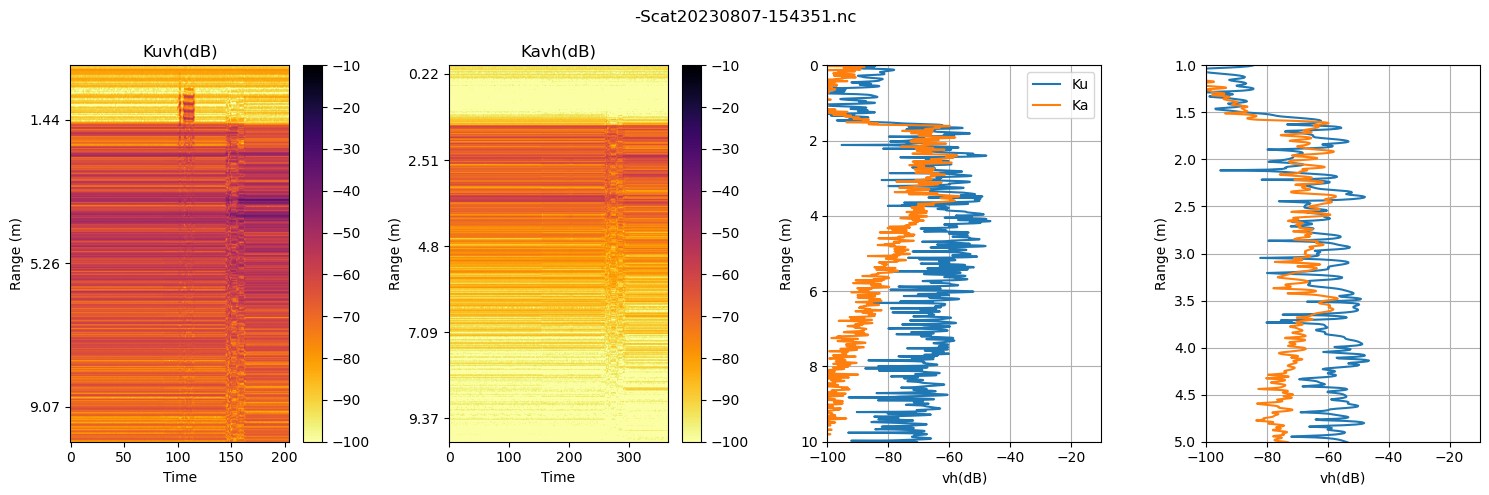

In [653]:
# plot the actual waveforms

for pol in ['hh', 'vv', 'hv', 'vh']:
    
    ku_power = kuka_powers['Ku_'+pol]
    ku_power_db = 10*np.log10(ku_power)
    start_ind=0
    ku_waveform = np.mean(ku_power[:,start_ind:start_ind+5], axis=1)
    ku_waveform_db = 10*np.log10(ku_waveform)
    ku_range = kuka_powers['Ku_range']
    
    ka_power = kuka_powers['Ka_'+pol]
    ka_power_db = 10*np.log10(ka_power)
    ka_waveform = np.mean(ka_power, axis=1)
    ka_waveform_db = 10*np.log10(ka_waveform)
    ka_range = kuka_powers['Ka_range']
    
    fig, axes = plt.subplots(1,4,figsize=(15, 5))
    
    #img0 = axes[0].imshow(power_db, aspect='auto', extent=[0, 205, 0, 2048]) # extent set the The bounding box in data coordinates that the image will fill. 
    img0 = axes[0].imshow(ku_power_db, aspect='auto',cmap='inferno_r',vmin=-100,vmax=-10)
    #img0 = axes[0].imshow(ku_power_db, aspect='auto',cmap='inferno_r')
    axes[0].set_title('Ku'+pol+'(dB)')
    axes[0].set_yticks(np.arange(0, len(ku_range), 500),np.round(ku_range[np.arange(0, len(ku_range), 500)],2))
    fig.colorbar(img0, ax=axes[0], orientation='vertical')  # Add colorbar
    # np.where(np.abs(ku_range - 10) < 0.01)[0] use this to find the matching index
    axes[0].set_ylim(1621,310)
    axes[0].set_ylabel('Range (m)')
    axes[0].set_xlabel('Time')
    
    img1 = axes[1].imshow(ka_power_db, aspect='auto',cmap='inferno_r',vmin=-100,vmax=-10)
    #img1 = axes[1].imshow(ka_power_db, aspect='auto',cmap='inferno_r')
    axes[1].set_title('Ka'+pol+'(dB)')
    axes[1].set_yticks(np.arange(0, len(ka_range), 500),np.round(ka_range[np.arange(0, len(ka_range), 500)],2))
    fig.colorbar(img0, ax=axes[1], orientation='vertical')  # Add colorbar
    # np.where(np.abs(ka_range - 10) < 0.01)[0] use this to find the matching index
    axes[1].set_ylim(2635,450)
    axes[1].set_ylabel('Range (m)')
    axes[1].set_xlabel('Time')


    axes[2].plot(ku_waveform_db, ku_range)
    axes[2].plot(ka_waveform_db, Ka_range)
    plt.gca().invert_yaxis()  # Invert the y-axis to set the origin at the upper left corner
    axes[2].set_ylim(10, 0)
    axes[2].set_xlim(-100, -10)
    axes[2].set_xlabel(pol+'(dB)')
    axes[2].set_ylabel('Range (m)')
    axes[2].grid(True)
    axes[2].legend(['Ku', 'Ka'])
    
    axes[3].plot(ku_waveform_db, ku_range)
    axes[3].plot(ka_waveform_db, Ka_range)
    plt.gca().invert_yaxis()  # Invert the y-axis to set the origin at the upper left corner
    axes[3].set_ylim(5, 1)
    axes[3].set_xlim(-100, -10)
    #axes[3].set_xlim(0, 0.001)
    axes[3].set_xlabel(pol+'(dB)')
    axes[3].set_ylabel('Range (m)')
    axes[3].grid(True)
    # axes[3].legend(['Ku', 'Ka'])
        
    plt.suptitle(kuka_timestamp)
    plt.tight_layout()
    plt.savefig(outputfolder+'waveforms'+kuka_timestamp+'.png')  # Save as PNG file
    plt.show()

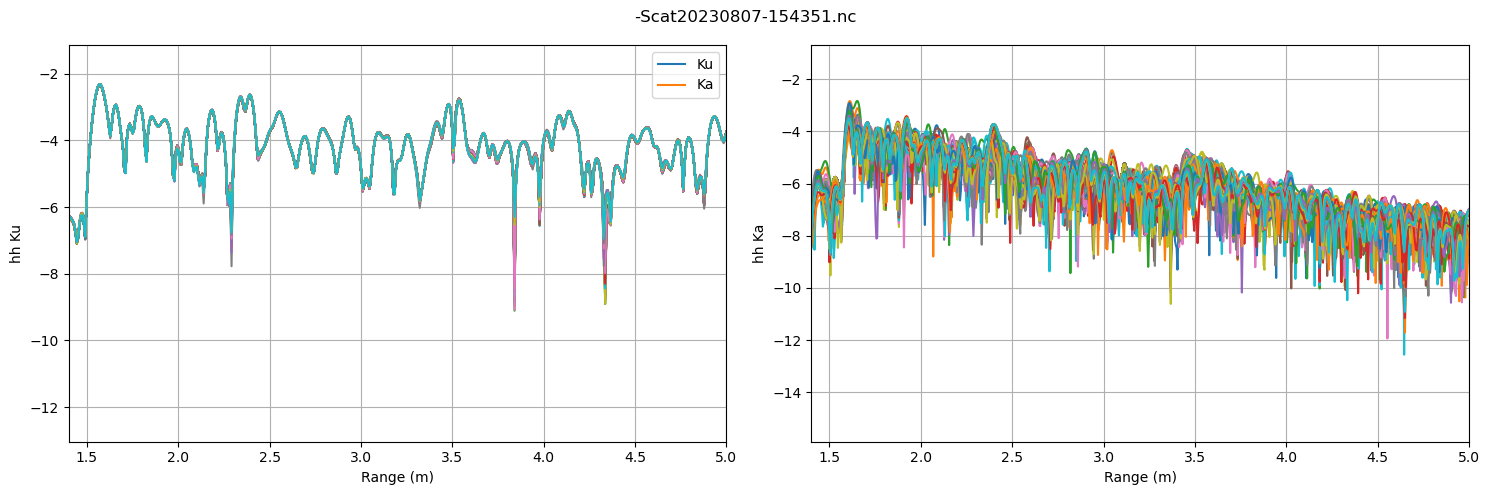

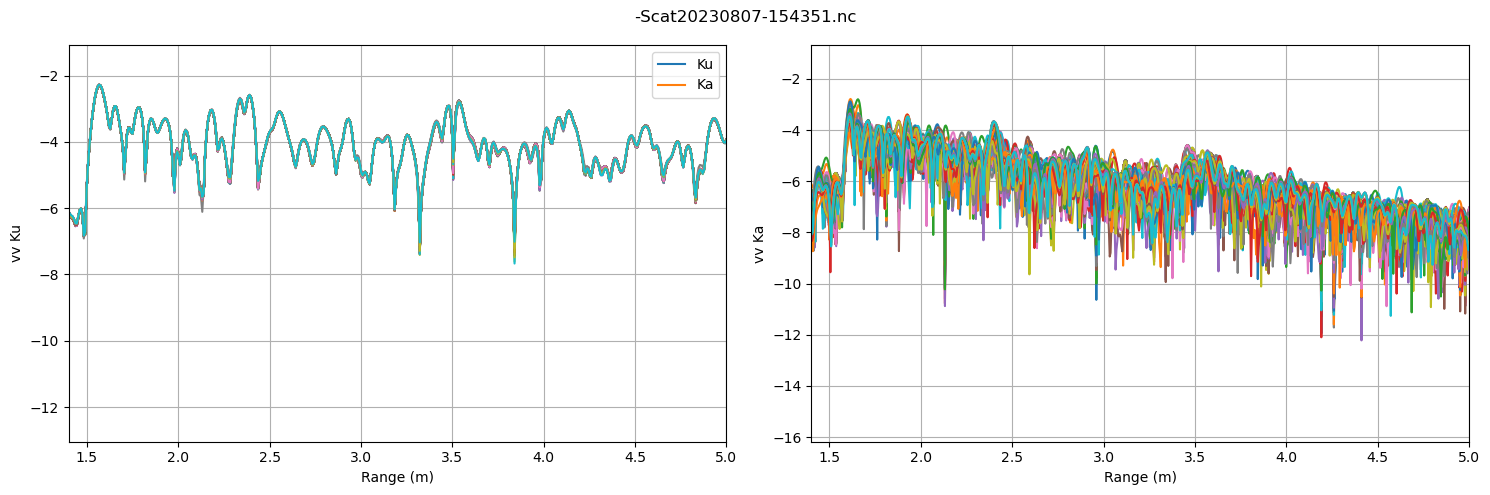

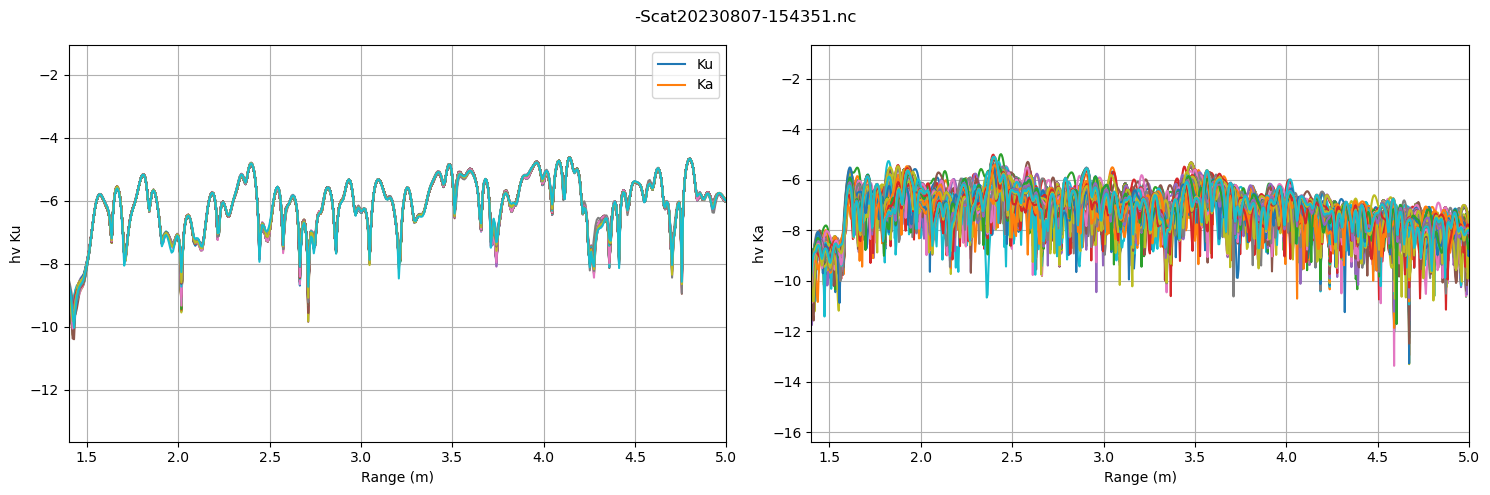

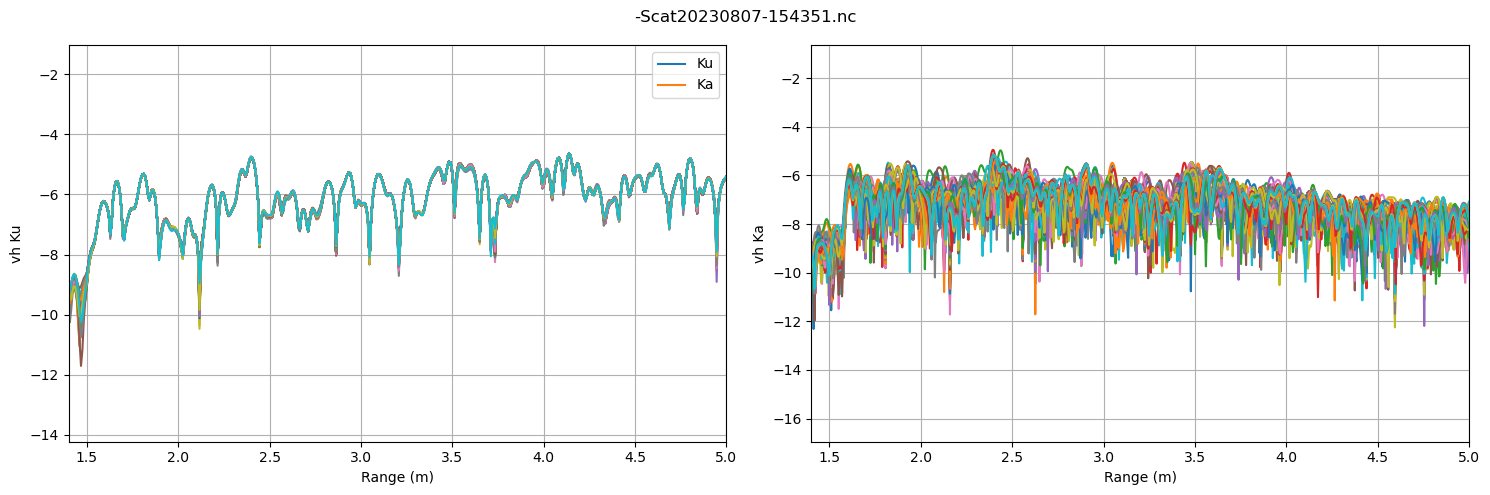

In [654]:
# plot the actual waveforms
# check with robbie's results

for pol in ['hh', 'vv', 'hv', 'vh']:
    
    start_ind=100
    
    ku_power = kuka_powers['Ku_'+pol]
    ku_waveform = ku_power[:,10:100]
    #ku_waveform = np.mean(ku_power, axis=1)
    ku_waveform = np.log10(ku_waveform) # check with robbie's results
    ku_range = kuka_powers['Ku_range']
    
    ka_power = kuka_powers['Ka_'+pol]
    ka_waveform = ka_power[:,0:300]
    #ka_waveform = np.mean(ka_power, axis=1)
    ka_waveform = np.log10(ka_waveform)
    ka_range = kuka_powers['Ka_range']
    
    fig, axes = plt.subplots(1,2,figsize=(15, 5))
    axes[0].plot(ku_range,ku_waveform)
    #axes[0].plot(Ka_range,ka_waveform)
    #plt.gca().invert_yaxis()  # Invert the y-axis to set the origin at the upper left corner
    axes[0].set_xlim(1.4, 5)
    #axes[0].set_ylim(0, 0.01)
    axes[0].set_ylabel(pol+' Ku')
    axes[0].set_xlabel('Range (m)')
    axes[0].grid(True)
    axes[0].legend(['Ku', 'Ka'])
    
    axes[1].plot(ka_range,ka_waveform)
    #axes[0].plot(Ka_range,ka_waveform)
    #plt.gca().invert_yaxis()  # Invert the y-axis to set the origin at the upper left corner
    axes[1].set_xlim(1.4, 5)
    #axes[1].set_ylim(0, 0.0004)
    axes[1].set_ylabel(pol+' Ka')
    axes[1].set_xlabel('Range (m)')
    axes[1].grid(True)
    #axes[1].legend(['Ku', 'Ka'])
        
    plt.suptitle(kuka_timestamp)
    plt.tight_layout()
    #plt.savefig(outputfolder+'waveforms'+kuka_timestamp+'.png')  # Save as PNG file
    plt.show()

In [655]:
ku_hh_power = kuka_powers['Ku_hh']
ku_hh_waveform = np.mean(ku_hh_power, axis=1)
ku_hh_waveform_db = 10*np.log10(ku_hh_waveform)
ku_range = kuka_powers['Ku_range']

ku_hv_power = kuka_powers['Ku_hv']
ku_hv_waveform = np.mean(ku_hv_power, axis=1)
ku_hv_waveform_db = 10*np.log10(ku_hv_waveform)
ku_range = kuka_powers['Ku_range']

ka_hh_power = kuka_powers['Ka_hh']
ka_hh_waveform = np.mean(ka_hh_power, axis=1)
ka_hh_waveform_db = 10*np.log10(ka_hh_waveform)
ka_range = kuka_powers['Ka_range']

ka_hv_power = kuka_powers['Ka_hv']
ka_hv_waveform = np.mean(ka_hv_power, axis=1)
ka_hv_waveform_db = 10*np.log10(ka_hv_waveform)
ka_range = kuka_powers['Ka_range']

In [656]:
snowpit

,Layers,Density,Permittivity (50 MHz),Loss (50 MHz),SD
0,95,0.235469,1.89920,0.09436,0
1,90,0.273865,1.98465,0.08476,5
2,85,0.282315,1.97376,0.08523,10
3,80,0.308302,1.97312,0.07367,15
4,75,0.316257,1.99423,0.08786,25
5,70,0.323116,2.08234,0.19364,25
6,65,0.366815,2.09635,0.18223,30
7,60,0.374169,2.11436,0.19898,35
8,55,0.385342,2.19178,0.09780,40
9,50,0.262551,2.01545,0.02687,45


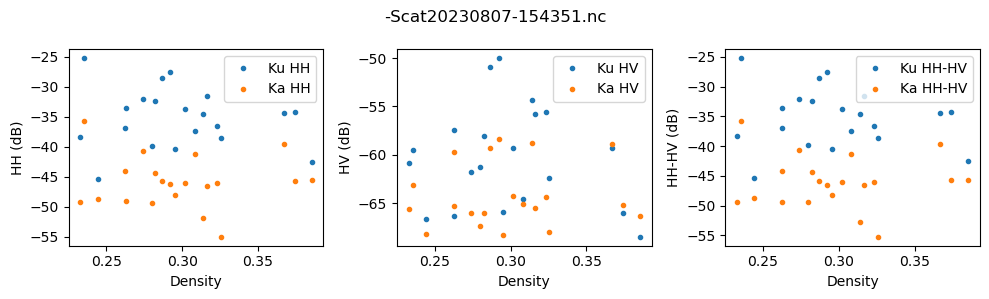

r ku hh: -0.1425677093240202
r ka hh: -0.03792422772580806
r ku hv: -0.1316724213214425
r ka hv: 0.07958499395410698
r ku hh-hv: -0.14237692982388184
r ka hh-hv: -0.03809760222178621


In [657]:
#-----for ku calculate averaging bin waveforms--------
bin_edges = np.arange(ku_height+0, np.round(ku_height+snow_max+snow_bin,3), snow_bin)
bin_indices = np.digitize(ku_range, bin_edges)
# Initialize an array to store the average ku_hh_waveform values for each bin
bin_ku_hh_waveform = np.zeros(len(bin_edges) - 1)
bin_ku_hv_waveform = np.zeros(len(bin_edges) - 1)
# Iterate over each bin
for i in range(1, len(bin_edges)):
    # Find the indices of ku_hh_waveform values that belong to the current bin
    indices_in_bin = np.where(bin_indices == i)[0]
    
    # Calculate the average of ku_hh_waveform values in the current bin
    if len(indices_in_bin) > 0:
        bin_ku_hh_waveform[i - 1] = np.mean(ku_hh_waveform[indices_in_bin])
        bin_ku_hv_waveform[i - 1] = np.mean(ku_hv_waveform[indices_in_bin])
        
#-----for ka calculate averaging bin waveforms--------       
bin_edges = np.arange(ka_height+0, np.round(ka_height+snow_max+snow_bin,3), snow_bin)
bin_indices = np.digitize(ka_range, bin_edges)        
bin_ka_hh_waveform = np.zeros(len(bin_edges) - 1)
bin_ka_hv_waveform = np.zeros(len(bin_edges) - 1)
# Iterate over each bin
for i in range(1, len(bin_edges)):
    # Find the indices of ku_hh_waveform values that belong to the current bin
    indices_in_bin = np.where(bin_indices == i)[0]
    
    # Calculate the average of ku_hh_waveform values in the current bin
    if len(indices_in_bin) > 0:       
        bin_ka_hh_waveform[i - 1] = np.mean(ka_hh_waveform[indices_in_bin])
        bin_ka_hv_waveform[i - 1] = np.mean(ka_hv_waveform[indices_in_bin])

#----plot the bin waveforms----------------     
# add bin_wavefrom to the snowpit dataframe
snowpit['ku_hh_waveform'] = bin_ku_hh_waveform
snowpit['ku_hv_waveform'] = bin_ku_hv_waveform
snowpit['ka_hh_waveform'] = bin_ka_hh_waveform
snowpit['ka_hv_waveform'] = bin_ka_hv_waveform
        
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

axes[0].plot(snowpit['Density'], 10*np.log10(snowpit['ku_hh_waveform']),'.')
axes[0].plot(snowpit['Density'], 10*np.log10(snowpit['ka_hh_waveform']),'.')
#axes[0].set_ylim(3, 0)
axes[0].set_xlabel('Density')
axes[0].legend(['Ku HH', 'Ka HH'])
axes[0].set_ylabel('HH (dB)')

axes[1].plot(snowpit['Density'], 10*np.log10(snowpit['ku_hv_waveform']),'.')
axes[1].plot(snowpit['Density'], 10*np.log10(snowpit['ka_hv_waveform']),'.')
#axes[0].set_ylim(3, 0)
axes[1].set_xlabel('Density')
axes[1].legend(['Ku HV', 'Ka HV'])
axes[1].set_ylabel('HV (dB)')

axes[2].plot(snowpit['Density'], 10*np.log10(snowpit['ku_hh_waveform']-snowpit['ku_hv_waveform']),'.')
axes[2].plot(snowpit['Density'], 10*np.log10(snowpit['ka_hh_waveform']-snowpit['ka_hv_waveform']),'.')
#axes0].set_ylim(3, 0)
axes[2].set_xlabel('Density')
axes[2].legend(['Ku HH-HV', 'Ka HH-HV'])
axes[2].set_ylabel('HH-HV (dB)')


plt.suptitle(kuka_timestamp)
plt.tight_layout()
plt.savefig(outputfolder+'scatter_waveform_snowpit'+kuka_timestamp+'.png')  # Save as PNG file
plt.show()

from scipy.stats import pearsonr
tmp1=snowpit['Density']
tmp2=10*np.log10(snowpit['ku_hh_waveform'])
pearson_corr, p_value = pearsonr(tmp1, tmp2)
print('r ku hh:',pearson_corr)
tmp2=10*np.log10(snowpit['ka_hh_waveform'])
pearson_corr, p_value = pearsonr(tmp1, tmp2)
print('r ka hh:',pearson_corr)
tmp2=10*np.log10(snowpit['ku_hv_waveform'])
pearson_corr, p_value = pearsonr(tmp1, tmp2)
print('r ku hv:',pearson_corr)
tmp2=10*np.log10(snowpit['ka_hv_waveform'])
pearson_corr, p_value = pearsonr(tmp1, tmp2)
print('r ka hv:',pearson_corr)
tmp2=10*np.log10(snowpit['ku_hh_waveform']-snowpit['ku_hv_waveform'])
pearson_corr, p_value = pearsonr(tmp1, tmp2)
print('r ku hh-hv:',pearson_corr)
tmp2=10*np.log10(snowpit['ka_hh_waveform']-snowpit['ka_hv_waveform'])
pearson_corr, p_value = pearsonr(tmp1, tmp2)
print('r ka hh-hv:',pearson_corr)

/tmp/ipykernel_313367/4220996344.py:25: RuntimeWarning: invalid value encountered in log10
  axes[2].plot(10*np.log10(ku_hh_waveform-ku_hv_waveform), ku_range-ku_height)
/tmp/ipykernel_313367/4220996344.py:26: RuntimeWarning: invalid value encountered in log10
  axes[2].plot(10*np.log10(ka_hh_waveform-ka_hv_waveform), Ka_range-ka_height)


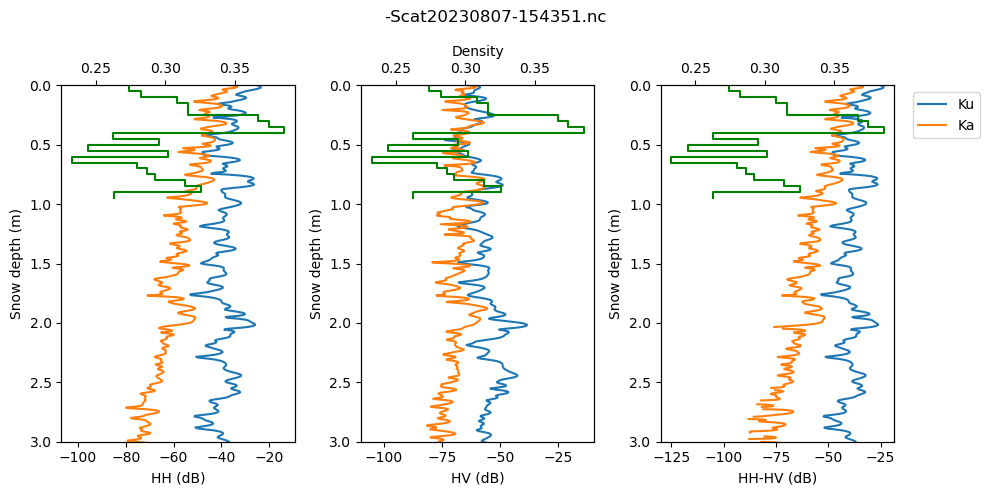

In [658]:
#snow_properties = 'Permittivity (50 MHz)'
snow_properties = 'Density'

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].plot(ku_hh_waveform_db, ku_range-ku_height)
axes[0].plot(ka_hh_waveform_db, Ka_range-ka_height)
axes[0].set_ylim(3, 0)
ax2 = axes[0].twiny()
ax2.step(snowpit[snow_properties], snowpit['SD']/100, where='post', color='green')
axes[0].set_xlabel('HH (dB)')
# axes[0].legend(['Ku HH', 'Ka HH', snow_properties])
axes[0].set_ylabel('Snow depth (m)')

axes[1].plot(ku_hv_waveform_db, ku_range-ku_height)
axes[1].plot(ka_hv_waveform_db, Ka_range-ka_height)
axes[1].set_ylim(3, 0)
ax2 = axes[1].twiny()
ax2.step(snowpit[snow_properties], snowpit['SD']/100, where='post', color='green')
ax2.set_xlabel(snow_properties)
# axes[1].legend(['Ku HV', 'Ka HV', snow_properties])
axes[1].set_xlabel('HV (dB)')
axes[1].set_ylabel('Snow depth (m)')

axes[2].plot(10*np.log10(ku_hh_waveform-ku_hv_waveform), ku_range-ku_height)
axes[2].plot(10*np.log10(ka_hh_waveform-ka_hv_waveform), Ka_range-ka_height)
axes[2].set_ylim(3, 0)
ax2 = axes[2].twiny()
ax2.step(snowpit[snow_properties], snowpit['SD']/100, where='post', color='green')
# ax2.set_xlabel(snow_properties)
axes[2].set_xlabel('HH-HV (dB)')
axes[2].legend(['Ku', 'Ka', snow_properties], loc='upper left', bbox_to_anchor=(1.05, 1))
axes[2].set_ylabel('Snow depth (m)')


plt.suptitle(kuka_timestamp)
plt.tight_layout()
plt.savefig(outputfolder+'waveform_snowpit'+kuka_timestamp+'.png')  # Save as PNG file
plt.show()
